<a href="https://www.kaggle.com/code/sophiabianchimoyen/performance-of-brazilian-students-in-enem?scriptVersionId=219861325" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Performance of Brazilian Students in the ENEM

Authors: Sophia Moyen & Emanuel Iwanow \
Date: 30.07.2024

### Summary

* [1. Introduction](#1)
    * [1.1 Motivation and Objective](#11)
    * [1.2 About the Dataset](#12)
    * [1.3 Problem Statement](#13)
* [2. Preprocessing](#2)
    * [2.1 Choosing which columns to import](#21)
    * [2.3 Dealing with misssing values](#22)
    * [2.4 Checking for duplicates and outliers](#23)
* [3. Exploratory Data Analysis](#3)
* [4. Feature Extraction](#4)
* [5. Hypothesis Testing](#5)
* [6. Modelling and Prediction](#6)
* [7. Conclusion](#7)
* [References](#8)


# 1. Introduction <a class="anchor" id="1"></a>
## 1.1. Motivation and Objective <a class="anchor" id="11"></a>
-  ### What is the ENEM?
ENEM (Exame Nacional do Ensino Médio) is a non-mandatory, **standardized national exam** held in Brazil for **college admissions**. Entry to federal universities, considered the best in the country, takes place solely based on the results of this test. More and more non-federal public universities and private universities have also accepted the results of this test as a form of admission. On the matter of relevevance, in 2016, there were 8.6 million people signed up to take it, which makes it the second largest in the world after China's National Higher Education Entrance Examination.

- ###  How is the ENEM structured?
The ENEM is a two-day exam held annually in November, simultaneously across the entire country. Each day of exam lasts 5 hours. The exam consists of multiple 180 multiple choice questions and one essay:
    
    | Subject | No of questions |
    | --- | --- |
    | **Language Abilities** (Portuguese, English/Spanish, and Reading) | 45 |
    | **Human Sciences** (History, Geography, Sociology, and Philosophy) | 45 |
    | **Mathematics** | 45 |
    | **Natural Sciences** (Physics, Biology, and Chemistry) | 45 |
    | **Critical Writing** | - |

   A special system of normalization is applied, called **TRI** (Teoria de Resposta ao Item). Following the TRI, each multiple choice question has a different value, calculated after normalization across the performance of all candidates to **avoid awarding students who "guessed" the right question**. A question that only a few candidates got right will have a higher value, but only if the candidate that got that question right also got "easier" questions right. This follows the logic that if a candidate is able to solve a complicated question, he/she should also have been able to solve an "easy" one, that many people got right. What in practice happens, e.g, it that two candidates may have scored exactly 144 questions out of the 180 and have had the same grade on the essay, but their final grades may be completely different because of the TRI.
    
     <table><tr>
    <td> 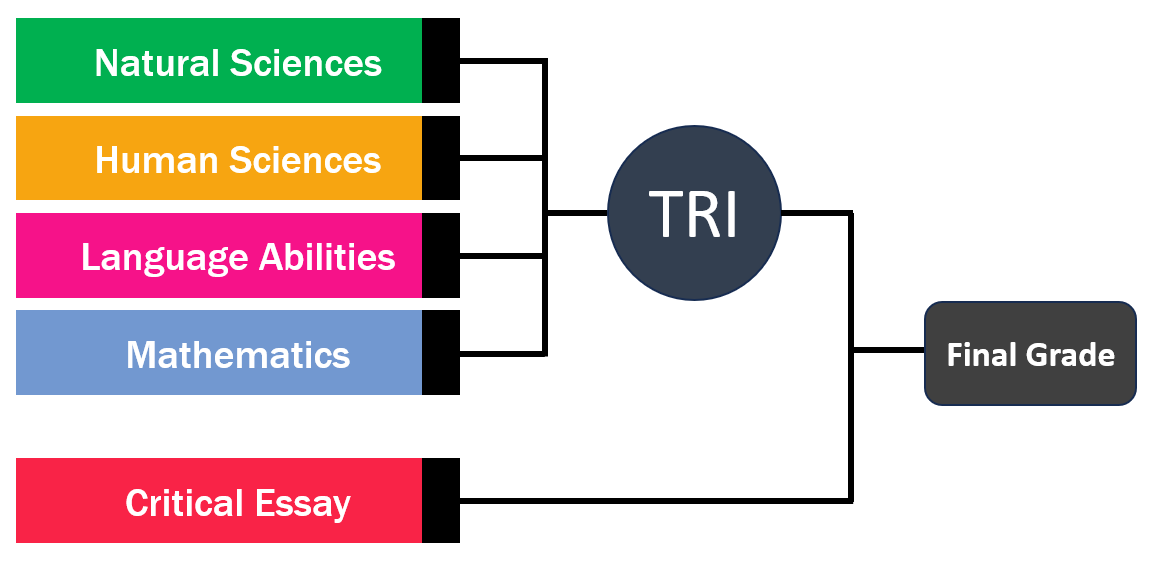 </td>
    <td> 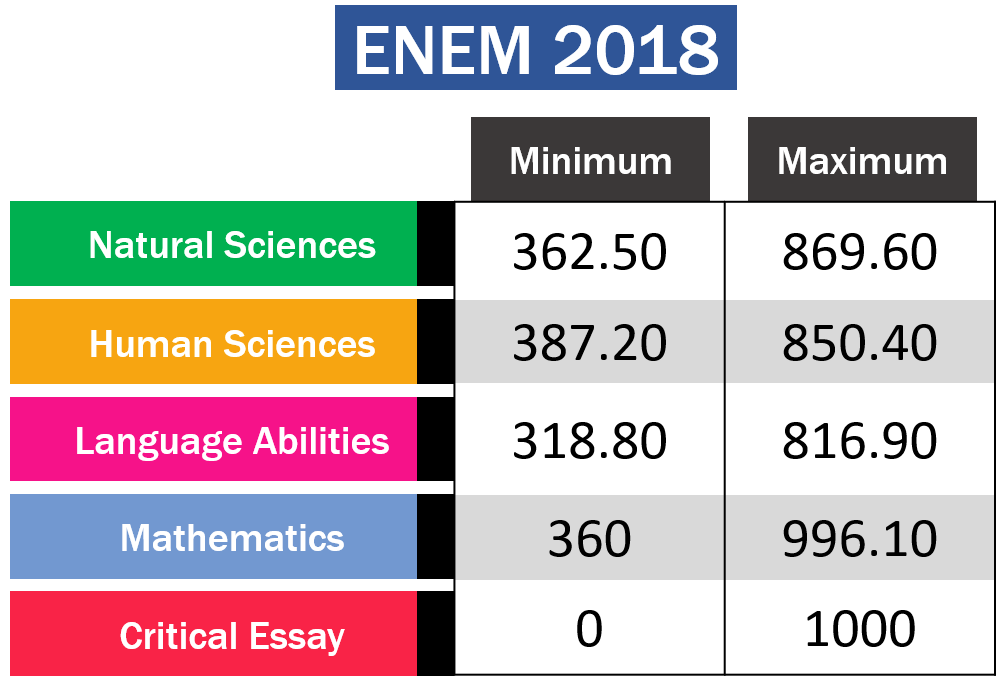 </td>
    </tr></table>
    
    The TRI normalization also means that **every year the maximum and minimum punctuation for each subject can only be known after the results**, as shown above for the year 2018. For example,in a certain year the maximum grade in Maths could be 850 and the other year 950. But the maximum range is always around 800-1100. This is of course doesn't apply to the critical essay grading, that always ranges betweeen 0 and 1000.

    The **implementation of this mathematical "trick"** is an important part of the exam and gives the standardized test score **more credibility** to evaluate the candidate knowledge and, in our case, analyse relationships between the candidates' grades and other socioeconomical features.

- ### Why is analysing the ENEM relevant?
Beyond its role in selecting students for universities, the ENEM offers a rich dataset to investigate the interplay between **socioeconomic factors** and **academic performance**.

    Understanding the socioeconomic determinants of ENEM performance is crucial for several reasons. First, it allows for a comprehensive assessment of the exam’s fairness and its ability to accurately measure students’ potential. Second, by identifying socioeconomic gaps in performance, **policymakers and educators** can develop targeted strategies to **mitigate inequalities and provide more educational opportunities** for disadvantaged students. Finally, exploring the predictive power of the ENEM in relation to a candidate's probability of success can inform the use of the exam as a selection tool for higher education.

## 1.2. About the Dataset <a class="anchor" id="12"></a>

The Brazilian Ministry of Education provides the microdata of the each year's event, [available in their website](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem). We were specially interested in analysing the ENEM from the year 2018 because that was the year in which we wrote the exam ourselves.

<div class="alert alert-info">
<strong><div style="color: rgb(0, 0, 0);">📌  Important infos:</div></strong> <br>

<div style="color: rgb(0, 0, 0);">→ In 2018, there were 5.5 million people taking the exam. Each row of the dataset corresponds to a candidate, we have 5513733 rows;</div>
<div style="color: rgb(0, 0, 0);">→ The dataset has 78 columns of information about each candidate;</div>
<div style="color: rgb(0, 0, 0);">→ The data has been anonimized such that no candidate can be identified by the microdata. To make this possible, a few features were transformed or removed. The candidate's place of birth and residence were removed and the age variable was replaced by age range. Some specifics about special application needs were also removed.;</div>
<div style="color: rgb(0, 0, 0);">→ Aside from the candidate's information related to the exam, a 27-question-socioeconomical questionnaire was also collected at the time of enrollment. Including questions related to the candidate's residence, parents and financial situation;</div>
</div>


All data has been collected was stored either as **numerical or alphanumerical** variables. A dictionary was provided to identify the corrspondance of the numbers/letters. For example, the column `TP_COR_RACA` stores the candidate's ethnicity as numerals. The column `Q024`, that corresponds the 24th question of the socioeconomical questionnaire, categorizes the answers with letters from A to E:

<table>
<tr><th> TP_COR_RACA </th><th> Q024 </th></tr>
<tr><td>

| Ethnicity | Variables |
| --- | --- |
| Not informed | 0 |
| White | 1 |
| Black | 2 |
| Pardo | 3 |
| Yellow | 4 |
| Indiginous | 5 |

</td><td>

| Do you have a computer at home? | Variables |
| --- | --- |
| No | A |
| Yes, one | B |
| Yes, two | C |
| Yes, three | D |
| Yes, four or more | E |

</td></tr> </table>



## 1.3. Problem Statement <a class="anchor" id="13"></a>

The microdata from the ENEM 2018 provides us many features related to each candidate, which enables us to investigate many tendencies regarding the exam. Our main goal will be to understand what factors influence a good grade at the exam and how socioeconomical factors influence a candidate's results. We can bring our goals for this report down to the following points:

1. **Exploratory Data Analysis**: Who are the ENEM 2018 candidates? How did they perform in the exam?
2. **Feature Extraction**: What features are important to predict a candidate's grade?
3. **Statistical Hypothesis Testing**: Based on the feature extraction, does feature X really influence a candidate's grade or is it just chance?
4. **Modeling and Prediction**: Can we create a model that is able to predict a candidate's grade? How well does it perform?

# 2. Preprocessing <a class="anchor" id="2"></a>

## 2.1 Choosing which columns to import <a class="anchor" id="21"></a>

Let's import the dataset and look how it is structured. The dataset has 5.5 million rows. To avoid importing unnecessary data, let's first filter which rows may be meaningful for analysis using common sense. In the dataset that is published in Kaggle, we can already see the distribution of variables for each column in the visualizer, before downloading it, which can give us already a hint about the data. For now, we will keep columns that are interesting for the exploratiory data analysis and the prediction. Afterwards, we will drop the unnecessary ones for prediction. At first we will keep the columns marked with ✅ and drop the ones marked with ❌. We will also only import 30k rows, because we have limited processing power.

| Column| Description | Keep? | If drop, why?|
| --- | --- | --- | --- |
| `NU_INSCRICAO` | Candidate's exam ID | ❌ | Random ID |
| `NU_ANO` | Year of exam | ❌  | Always 2018 | 
| `TP_FAIXA_ETARIA` | Age range | ✅  | - | 
| `TP_SEXO` | Sex |  ✅ | - |
| `TP_ESTADO_CIVIL` | Marital status |✅ | - |
| `TP_COR_RACA` | Ethnicity | ✅  | - | 
| `TP_NATIONALITY` | Nationality |❌| Almost all candidates are Brazilian (97%) |
| `TP_ST_CONCLUSAO` | If candidate has already finished/is finishing high school |✅ | - |
| `TP_ANO_CONCLUIU` | Year that candidate finished high school |❌ | Shouldn't influence score |
| `TP_ESCOLA` | Type of school (Public, Private, Exterior) |✅ | - |
| `TP_ENSINO` | Type institution (regular, special, adults) |✅ | - |
| `IN_TREINEIRO` | If person is using the exam only as training |✅ | - |
| `CO_MUNICIPIO_ESC` | Code of city of candidate's school |❌ | Too many cities (could use to cross with cities information, like HDI - next time I guess) |
| `NO_MUNICIPIO_ESC` | Name of city of candidate's school |❌ | Same as above |
| `CO_UF_ESC` | Code of state of candidate's school |❌ | Will just take the name of the state |
| `SG_UF_ESC` | Name of state of candidate's school |✅ | - |
| `TP_DEPENDENCIA_ADM_ESC` | School's relation to the state (State, City, National, Private) | ❌ | Will just differentiate between private and public school |
| `TP_LOCALIZACAO_ESC` | Location of school (Rural, Urban) |✅ | - |
| `TP_SIT_FUNC_ESC` | Activity of school? (Inactive, Active, Shut down) |❌| Not relevant and all filled rows indicate 'active' |
| `CO_MUNICIPIO_PROVA` | Code of city where exam was written |❌ | Shouldn't influence score |
| `NO_MUNICIPIO_PROVA` | Name of city where exam was written |❌ | Shouldn't influence score |
| `CO_UF_PROVA` | Code of state where exam was written |❌ | Shouldn't influence score |
| `SG_UF_PROVA` | Name of state where exam was written |✅ | - |
| `TP_PRESENCA_CN` | Presence for Natural Sciences' exam | ✅ | - |
| `TP_PRESENCA_CH` | Preence for Human Sciences' exam | ✅ | - |
| `TP_PRESENCA_LC` | Presence for Language Abilities' exam | ✅ |- |
| `TP_PRESENCA_MT` | Presence for Mathematics' exam | ✅ | - |
| `CO_PROVA_CN` | Code of type of exam for Natural Sciences | ❌ | Should be irrelevant |
| `CO_PROVA_CH` | Code of type of exam for Human Sciences | ❌ | Should be irrelevant |
| `CO_PROVA_LC` | Code of type of exam for Language Abilities | ❌ | Should be irrelevant |
| `CO_PROVA_MT` | Code of type of exam for Mathematics | ❌ | Should be irrelevant |
| `NU_NOTA_CN` | Grade for Natural Sciences | ✅ | - |
| `NU_NOTA_CH` | Grade for Human Sciences | ✅ | - |
| `NU_NOTA_LC` | Grade for Language Abilities | ✅ | - |
| `NU_NOTA_MT` | Grade for Mathematics | ✅ | - |
| `TX_RESPOSTAS_CN` | Vector with candidates' answers (A,B,C,D,E) for Natural Sciences | ❌ | Should be irrelevant |
| `TX_RESPOSTAS_CH` | Vector with candidates' answers (A,B,C,D,E)  for Human Sciences | ❌ | Should be irrelevant |
| `TX_RESPOSTAS_LC` | Vector with candidates' answers (A,B,C,D,E) for Language Abilities | ❌ | Should be irrelevant |
| `TP_LINGUA`| Foreign language chosen for exam (English/Spanish) | ✅ | - |
| `TX_GABARITO_MT` | Vector with correct answers (A,B,C,D,E)  for Mathematics | ❌ | Should be irrelevant |
| `TX_GABARITO_CN` | Vector with corrrect answers (A,B,C,D,E) for Natural Sciences | ❌ | Should be irrelevant |
| `TX_GABARITO_CH` | Vector with correct answers (A,B,C,D,E)  for Human Sciences | ❌ | Should be irrelevant |
| `TX_GABARITO_LC` | Vector with correct answers (A,B,C,D,E) for Language Abilities | ❌ | Should be irrelevant |
| `TX_GABARITO_MT` | Vector with correct answers (A,B,C,D,E)  for Mathematics | ❌ | Should be irrelevant |
| `TP_STATUS_REDACAO`| If got immediate 0 for essay or not and why | ❌ | Should be irrelevant |
| `NU_NOTA_COMP1` | Grade for comptence 1 for Critical Writing Essay | ❌ | Will just get the final grade for the essay |
| `NU_NOTA_COMP2` | Grade for comptence 2 for Critical Writing Essay | ❌ | Will just get the final grade for the essay |
| `NU_NOTA_COMP3` | Grade for comptence 3 for Critical Writing Essay | ❌ | Will just get the final grade for the essay |
| `NU_NOTA_COMP4` | Grade for comptence 4 for Critical Writing Essay | ❌ | Will just get the final grade for the essay |
| `NU_NOTA_REDACAO` | Grade for Critical Writing Essay | ✅ | - |
| `Q001` | Level of education of candidate's father | ✅ | - |
| `Q002` | Level of education of candidate's mother | ✅ | - |
| `Q003` | Type of job from father (classes A to F) | ✅ | - |
| `Q004` | Type of job from mother (classes A to F) | ✅ | - |
| `Q005` | How many people live in your house? | ✅ | - |
| `Q006` | What is your family's income? (classes A to K) | ✅ | - |
| `Q007` | Does your family hire domestic help (house cleaning etc.)? | ✅ | - |
| `Q008` | Are there any bathrooms in your house? How many? | ✅ | - |
| `Q009` | How many bedrooms are there in your house? | ✅ | - |
| `Q010` | Does someone in your residence have a car? | ✅ | - |
| `Q011` | Does someone in your residence have a motorcycle? | ✅ | - |
| `Q012` | Is there a fridge in your residence? | ✅ | - |
| `Q013` | Is there a freezer in your residence? | ✅ | - |
| `Q014` | Is there a washing machine in your residence?  How many?| ✅ | - |
| `Q015` | Is there a drying machine in your residence | ✅ | - |
| `Q016` | Is there a microwave in your residence? How many? | ✅ | - |
| `Q017` | Is there a washing machine in your residence? | ✅ | - |
| `Q018` | Is there a vacuum cleaner in your residence? | ✅ | - |
| `Q019` | Is there a color TV in your residence? How many? | ✅ | - |
| `Q020` | Is there a DVD player in your residence? | ✅ | - |
| `Q021` | Do you pay for TV cable in your residence? | ✅ | - |
| `Q022` | Does anyone in your residence have a mobile phone? How many? | ✅ | - |
| `Q023` | Is there a telephone in your residence? | ✅ | - |
| `Q024` | Are there any computers in your residence? How many?| ✅ | - |
| `Q025` | Is there internet connection in your residence?  | ✅ | - |
| `Q026` | Have you already finished high school? | ❌ | Repeated question |
| `Q027` | What type of high school did you attend? | ✅ | - |



In [1]:
# Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno # !pip install missingno
import seaborn as sns # >0.13.0
from copy import deepcopy
import seaborn as sns

# Number of rows to import (it takes a lot of memory to use all 5.5 million)
NROWS = 30000

# Selecting columns to import
relevant_columns = ['TP_FAIXA_ETARIA', 'TP_SEXO','TP_ESTADO_CIVIL', 'TP_COR_RACA','TP_ST_CONCLUSAO',
                    'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO','SG_UF_ESC','TP_LOCALIZACAO_ESC', 
                    'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_PRESENCA_MT', 'NU_NOTA_CN', 
                    'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
                    'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
                    'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
                    'Q023', 'Q024', 'Q025','Q027']

# Reading dataset
df = pd.read_csv('/kaggle/input/enem-2018/MICRODADOS_ENEM_2018.csv',encoding='iso-8859-1',sep=";",usecols=relevant_columns, nrows=NROWS)

# Let's ignore the candidates that were just doing the exam for practice
df = df[df['IN_TREINEIRO']==0]

# Let's only select candidates that were present in all exams
df = df[(df['TP_PRESENCA_CN'] == 1) & (df['TP_PRESENCA_CH'] == 1) & (df['TP_PRESENCA_LC'] == 1) & (df['TP_PRESENCA_MT'] == 1)]

# Let's now these columns, we won't use them anymore
df = df.drop(['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT','IN_TREINEIRO'], axis=1)

# Let's reindex
df = df.reset_index(drop=True)

## 2.2. Dealing with missing values <a class="anchor" id="22"></a>

In [2]:
print("Missing values in the dataset:",df.isnull().sum().sum())

Missing values in the dataset: 32995


<Axes: >

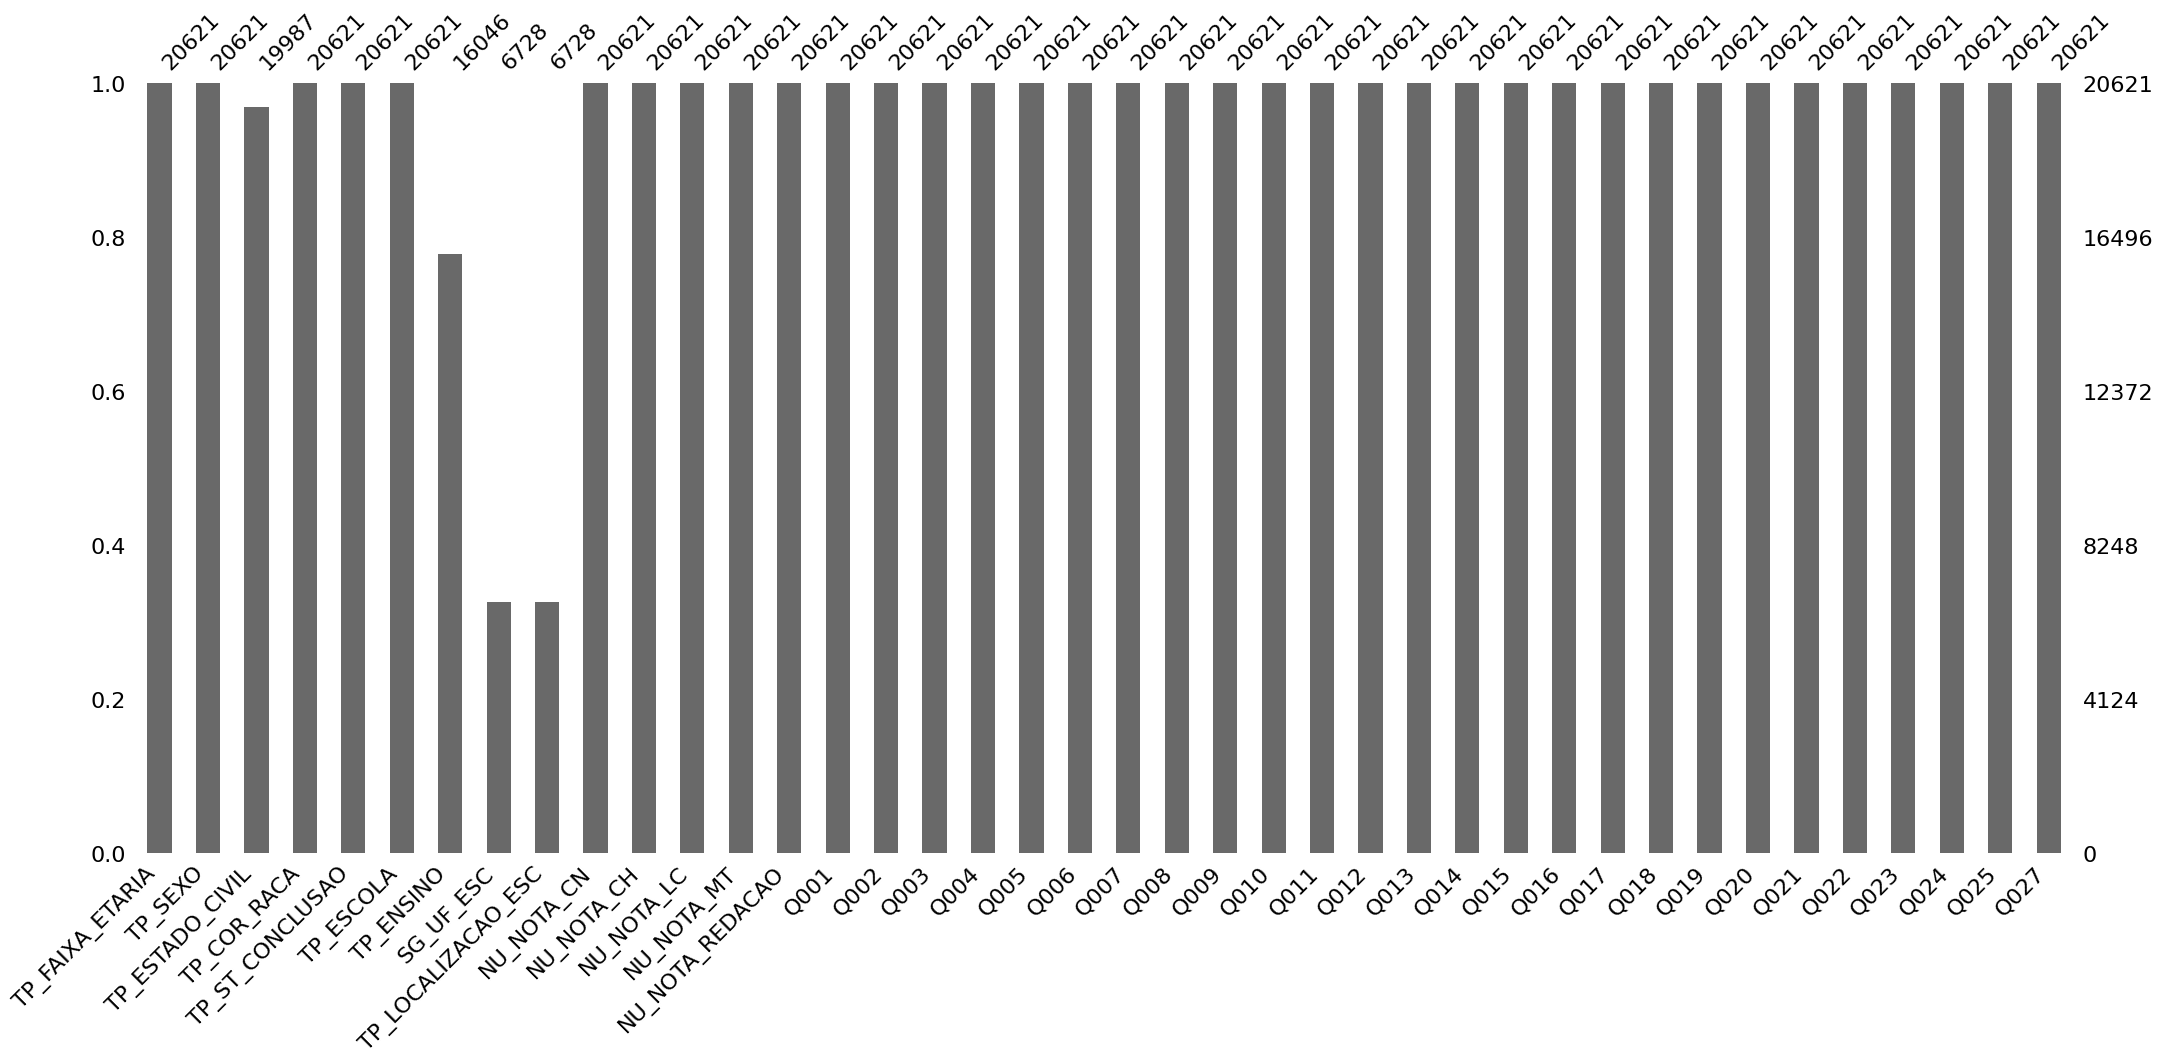

In [3]:
# Let's plot the amount of missing values per column
msno.bar(df)

We can see that the following columns have missing values. If the percentage of missing values is too high, we will just drop it. If it is relatively small we will try to fill in the missing values with the mode. It is not the best strategy to just drop valuable information, but will leave a more deep analysis crossing the candidates' residence data to a next time.


| Column | Description | Number of missing values | Percentage of dataset | Strategy |
| --- | --- | --- | --- | ---|
|`SG_UF_ESC`| State of candidate's school;|13893 |67.4% |Drop |
| `TP_LOCALIZACAO_ESC`| Location of candidate's school: Urban/Rural|13893|67.4% | Drop|
| `TP_ESTADO_CIVIL`| Marital status|634|3.1% |Substitute with mode |
| `TP_ENSINO`|Type of institution: Regular, Adults, Apecial|4575|22.1% |Substitute with mode |

Let's check what is the mode for these columns and if the percentage of the mode in the sample is significantly higher than other variables for us to be able to substitute the missing values with them.

In [8]:
# Dropping columns for state and location of candidate's school
df = df.drop(columns=['SG_UF_ESC','TP_LOCALIZACAO_ESC'])

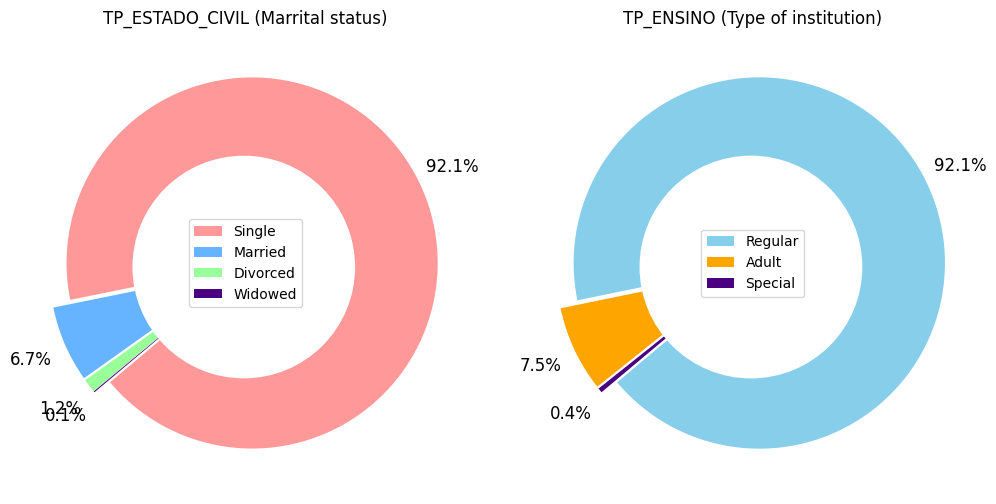

In [9]:
# Checking the modes of the columns for marrital status and type of institution
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figure size

# Pie chart 1
wedges1, texts1, autotexts1 = ax1.pie(df['TP_ESTADO_CIVIL'].value_counts(), colors = ['#ff9999','#66b3ff','#99ff99','indigo'],autopct='%1.1f%%', pctdistance=1.2, startangle=220, textprops={'fontsize': 12},explode=(0.05,0.05,0.05,0.05))
ax1.legend(wedges1,['Single','Married','Divorced','Widowed'], loc="center")
centre_circle1 = plt.Circle((0, 0), 0.60, fc='white')
ax1.add_artist(centre_circle1)
ax1.set_title("TP_ESTADO_CIVIL (Marrital status)")

# Pie chart 2 with enhancements
wedges2, texts2, autotexts2 = ax2.pie(df['TP_ENSINO'].value_counts(),  colors=['skyblue','orange','indigo'],autopct='%1.1f%%', pctdistance=1.2, startangle=220, textprops={'fontsize': 12},explode=(0.05,0.05,0.05))
ax2.legend(wedges2,['Regular','Adult','Special'], loc="center")
centre_circle2 = plt.Circle((0, 0), 0.60, fc='white')
ax2.add_artist(centre_circle2)
ax2.set_title("TP_ENSINO (Type of institution)")

# Equal aspect ratio for both subplots
ax1.axis('equal')
ax2.axis('equal')

plt.show()

Most people writing the ENEM 2018 are single and come from regular high schools, which makes absolute sense. The mode for `TP_ESTADO_CIVIL` is `Single` with a very high percentage , so if we substitute the missing values from `TP_ESTADO_CIVIL` with the mode, we will very likely be assigning the right variable to the missing values. The same applies to `TP_ENSINO`:

In [10]:
# Substituting missing values with mode
df["TP_ESTADO_CIVIL"] = df["TP_ESTADO_CIVIL"].fillna( float( df['TP_ESTADO_CIVIL'].mode().iloc[0] ) )
df["TP_ENSINO"] = df["TP_ENSINO"].fillna( float( df['TP_ENSINO'].mode().iloc[0] ) ) 

In [11]:
print("Missing values in the dataset:",df.isnull().sum().sum())

Missing values in the dataset: 0


## 2.3 Checking for duplicates and outliers <a class="anchor" id="23"></a>

Let's see if there any duplicates first:

In [12]:
# Check if there are duplicates
duplicates = df.duplicated()

if duplicates.any():
    # Option 1: Print the entire row with duplicates
    print(df[duplicates])

    # Option 2: Count the number of duplicates
    print(duplicates.sum(), "duplicate rows found")
else:
    print("No duplicate rows found in the dataset")

No duplicate rows found in the dataset


Let's now see if there any outliers regarding the grades of the candidates. The Ministry of Education provided the maximum and minimum grades for each subject, so all grades shouls be within this range. Since the data was already treated by them, this is just an extra careful step.

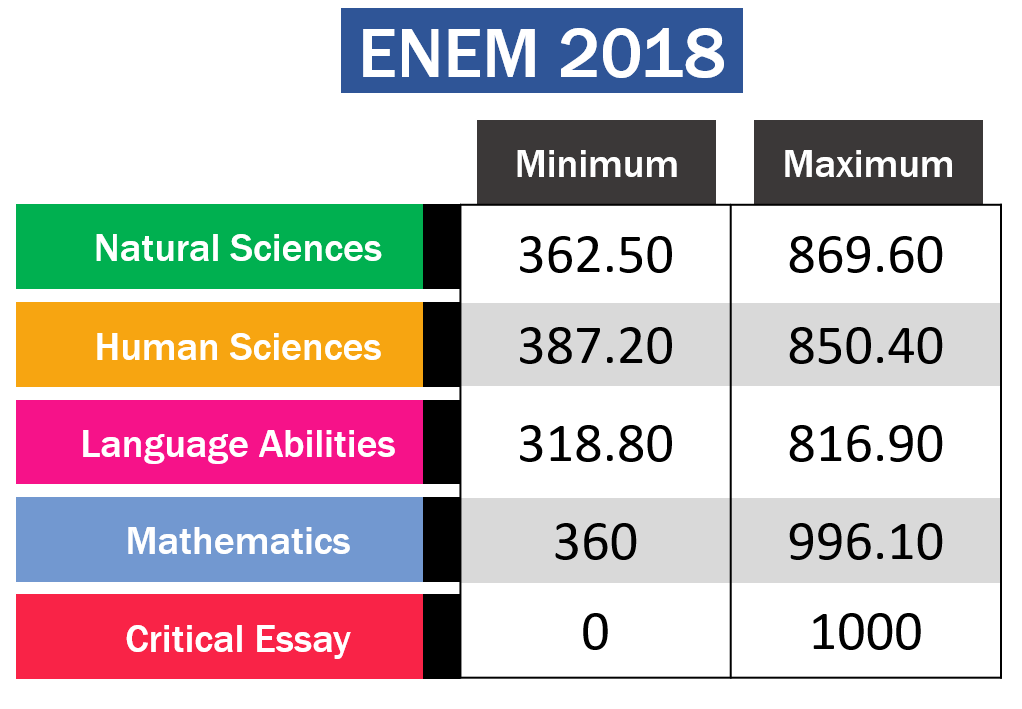

In [13]:
outliers = df[(df["NU_NOTA_CN"] < 362.50) | (df["NU_NOTA_CN"] > 869.60) |
              (df["NU_NOTA_CH"] < 387.20) | (df["NU_NOTA_CN"] > 850.40) |
              (df["NU_NOTA_LC"] < 318.80) | (df["NU_NOTA_CN"] > 816.90) |
              (df["NU_NOTA_MT"] < 360) | (df["NU_NOTA_CN"] > 996.10) |
              (df["NU_NOTA_REDACAO"] < 0) | (df["NU_NOTA_CN"] > 1000)]

print("We found", len(outliers),"outliers to drop")

# Dropping outliers
df = df.drop(outliers.index)

We found 24 outliers to drop


<div class="alert alert-info">
<strong><div style="color: rgb(0, 0, 0);">📌  Preprocessing summary:</div></strong> <br>

<div style="color: rgb(0, 0, 0);">→ Imported only columns that may be interesting for EDA and prediction of candidate's final grade;</div>
<div style="color: rgb(0, 0, 0);">→ Imported a reduced number of rows (5.5 mi too heavy);</div>
<div style="color: rgb(0, 0, 0);">→ Removed candidates that were just using the exam to practice (treineiros);</div>
<div style="color: rgb(0, 0, 0);">→ Removed candidates that didn't show up to at least one of the exams;</div>
<div style="color: rgb(0, 0, 0);">→ Droped "presence" columns after previous step;</div>
<div style="color: rgb(0, 0, 0);">→ Dropped columns that had too many missing values and weren't very relevant for analysis;</div>
<div style="color: rgb(0, 0, 0);">→ Replaced missing values for the mode for some columns that had only a few missing values;</div>
</div>

# 3. Exploratory Data Analysis <a class="anchor" id="3"></a>

Now that we have a cleaned dataset, let's try to answer the following questions to understand:

> Who are the ENEM 2018 candidates? How did they perform in the exam?

The following questions can help us uncover the main aspects of our dataset:

> 1. What is the **percentage** of each **class category** (age, sex, type of school, income, internet at home) among candidates?
> 2. What is the **distribution of grades** for each subject?
> 3. What are the **mean grades** for each **class category**?

## 3.1 What is the percentage of each class category among candidates? <a class="anchor" id="31"></a>

We have already seen in the preprocessing step that most of our candidates are single and come from a regular high school. Let's check out some other information:

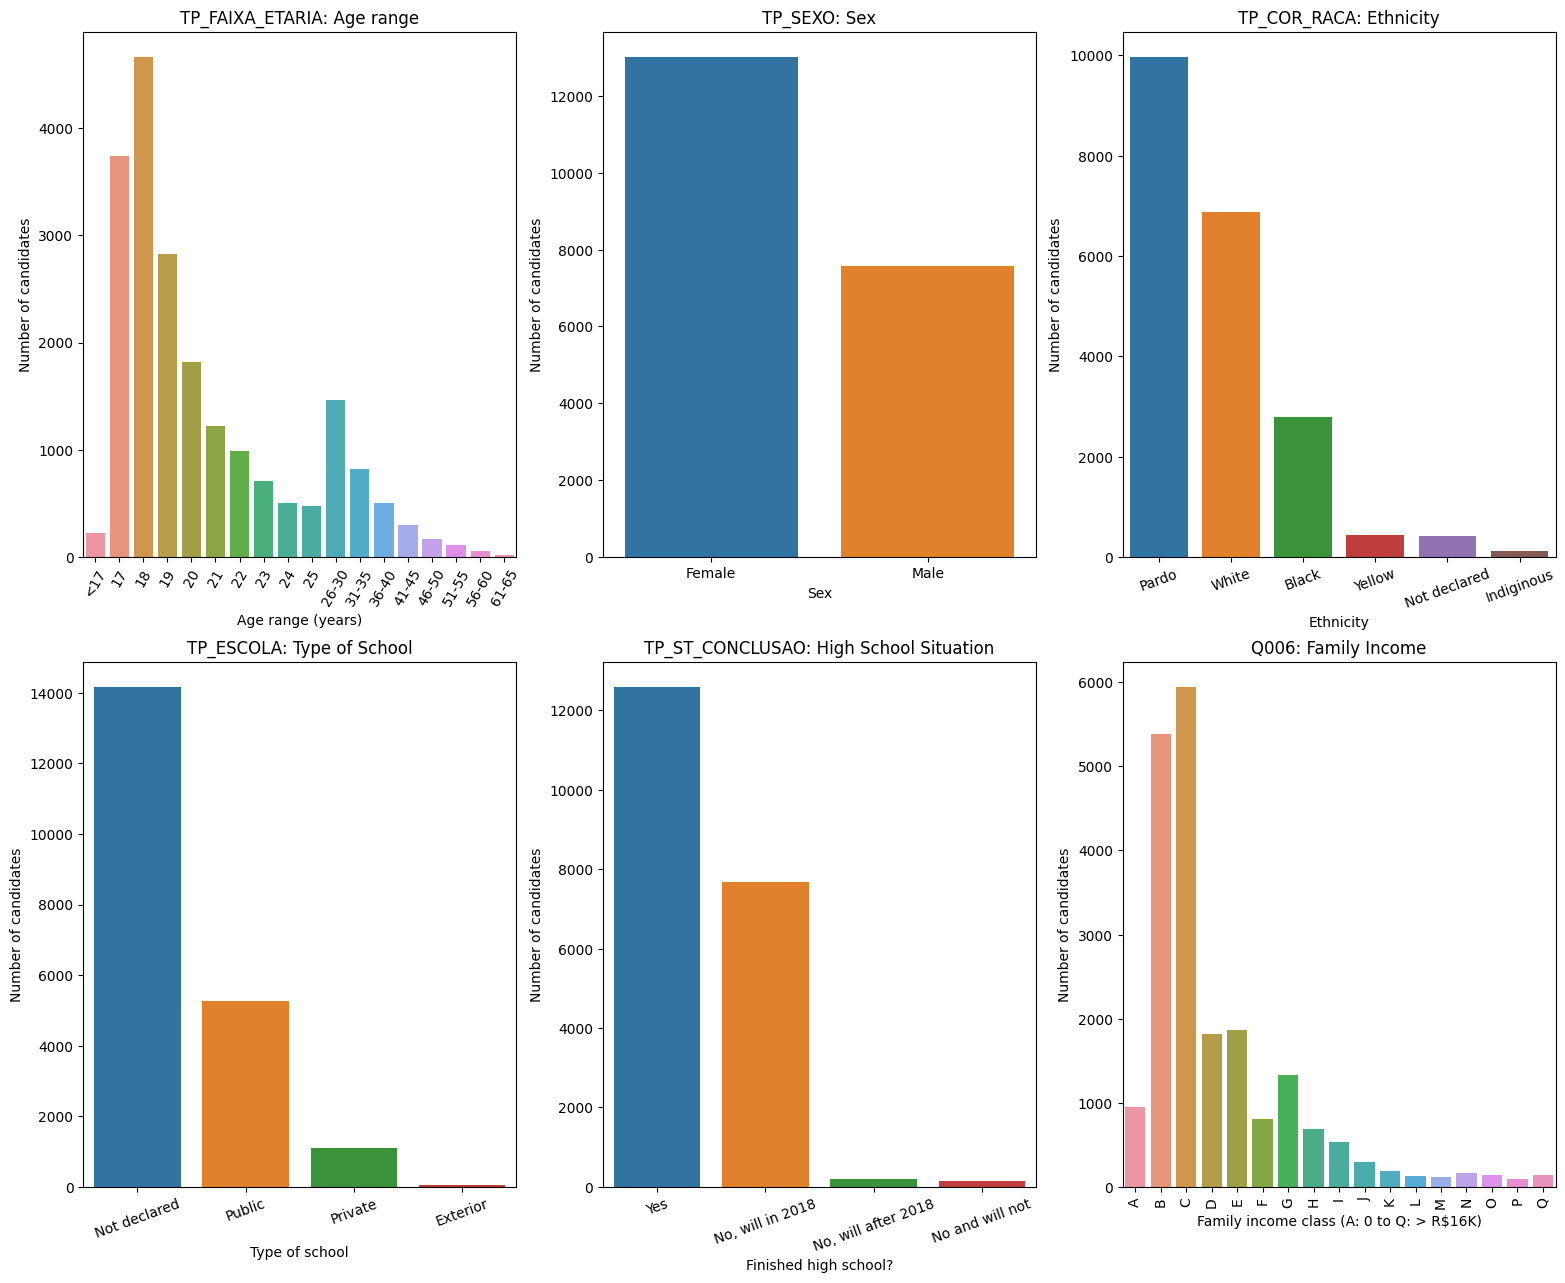

In [32]:
# Creating a copy of original dataset to change name variables for readability
df_EDA = deepcopy(df)

# Creating 6 subplots
fig, ax = plt.subplots(2, 3, figsize=(19, 15))

# Age range
df_EDA = df_EDA.sort_values(by='TP_FAIXA_ETARIA')
df_EDA['TP_FAIXA_ETARIA'] = df_EDA['TP_FAIXA_ETARIA'].map({1:'<17',2:'17',3:'18',4:'19',5:'20',6:'21',7:'22',8:'23',9:'24',10:'25',11:'26-30',12:'31-35',13:'36-40',14:'41-45',15:'46-50',16:'51-55',17:'56-60',18:'61-65'})
ax1 = ax[0,0]
sns.countplot(x=df_EDA['TP_FAIXA_ETARIA'], ax=ax1)
ax1.set(xlabel='Age range (years)', ylabel='Number of candidates',title='TP_FAIXA_ETARIA: Age range')
for label in ax1.get_xticklabels():
    label.set_rotation(60)
    
# Sex
df_EDA['TP_SEXO'] = df_EDA['TP_SEXO'].map({'F':'Female','M':'Male'})
ax2 = ax[0,1]
sns.countplot(x=df_EDA['TP_SEXO'], ax=ax2)
ax2.set(xlabel='Sex', ylabel='Number of candidates',title='TP_SEXO: Sex')
    
# Ethnicity
df_EDA['TP_COR_RACA'] = df_EDA['TP_COR_RACA'].map({0:'Not declared',1:'White',2:'Black',3:'Pardo',4:'Yellow',5:'Indiginous'})
ax3 = ax[0,2]
sns.countplot(x=df_EDA['TP_COR_RACA'], ax=ax3, order=df_EDA['TP_COR_RACA'].value_counts(ascending=False).index)
ax3.set(xlabel='Ethnicity', ylabel='Number of candidates',title='TP_COR_RACA: Ethnicity')
for label in ax3.get_xticklabels():
    label.set_rotation(20)
    
    
# School (Private, Public)
df_EDA['TP_ESCOLA'] = df_EDA['TP_ESCOLA'].map({1:'Not declared',2:'Public',3:'Exterior',4:'Private'})
ax4 = ax[1,0]
sns.countplot(x=df_EDA['TP_ESCOLA'], ax=ax4, order=df_EDA['TP_ESCOLA'].value_counts(ascending=False).index)
ax4.set(xlabel='Type of school', ylabel='Number of candidates',title='TP_ESCOLA: Type of School')
for label in ax4.get_xticklabels():
    label.set_rotation(20)
    
# Situation high school (finished, finishing)
df_EDA['TP_ST_CONCLUSAO'] = df_EDA['TP_ST_CONCLUSAO'].map({1:'Yes',2:'No, will in 2018',3:'No, will after 2018',4:'No and will not'})
ax5 = ax[1,1]
sns.countplot(x=df_EDA['TP_ST_CONCLUSAO'], ax=ax5, order=df_EDA['TP_ST_CONCLUSAO'].value_counts(ascending=False).index)
ax5.set(xlabel='Finished high school?', ylabel='Number of candidates',title='TP_ST_CONCLUSAO: High School Situation')
for label in ax5.get_xticklabels():
    label.set_rotation(20)
    
# Family income
df_EDA = df_EDA.sort_values(by='Q006')
ax6 = ax[1,2]
sns.countplot(x=df_EDA['Q006'], ax=ax6)
ax6.set(xlabel='Family income class (A: 0 to Q: > R$16K)', ylabel='Number of candidates',title='Q006: Family Income')
for label in ax6.get_xticklabels():
    label.set_rotation(90)

plt.show()

<div class="alert alert-info">
<strong><div style="color: rgb(0, 0, 0);">📌  Insights:</div></strong> <br>

<div style="color: rgb(0, 0, 0);">→ The majority of candidates are 17-19 years old. With a peak again at the 26-30 age gap, which could represent people trying a career change reapplying for college.;</div>
<div style="color: rgb(0, 0, 0);">→ There are more female than male candidates;</div>
<div style="color: rgb(0, 0, 0);">→ Too many people decided not to declare their type of school. We should probably drop this feature to avoid misleading information for the predictor.;</div>
<div style="color: rgb(0, 0, 0);">→ We can also see the majority of the candidates answered their family income is from A-C (R\$0 - R$1431), which is around one minimum wage;</div>
</div>

## 3.2 What is the distribution of grades for each subject?

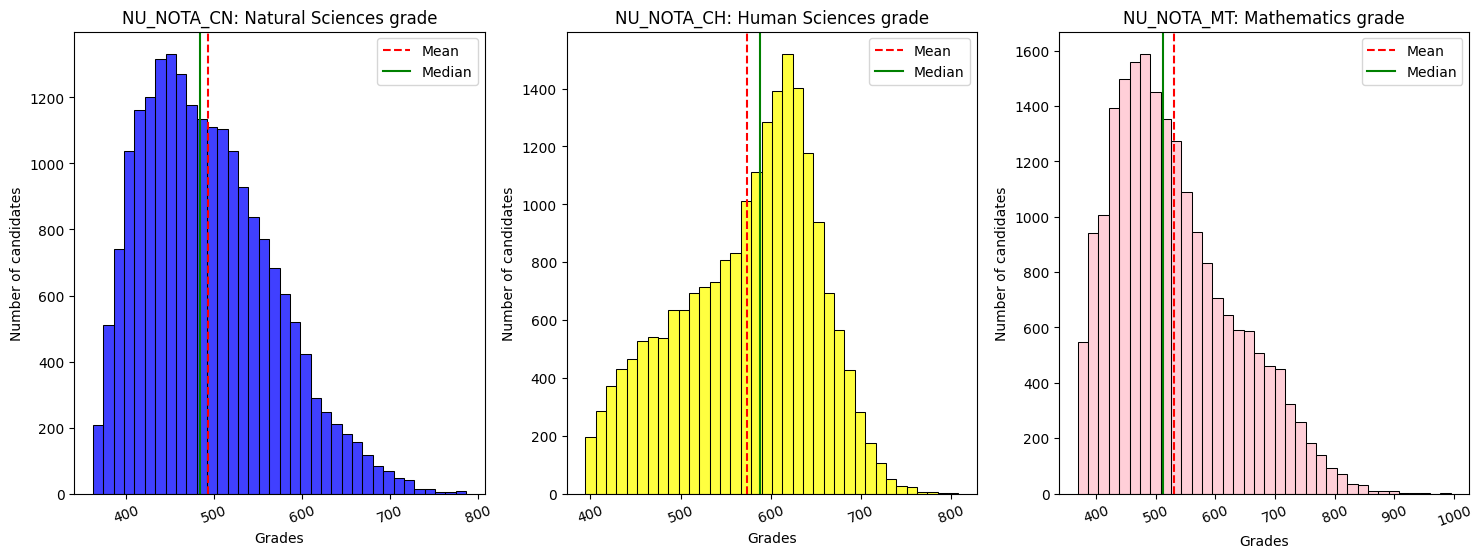

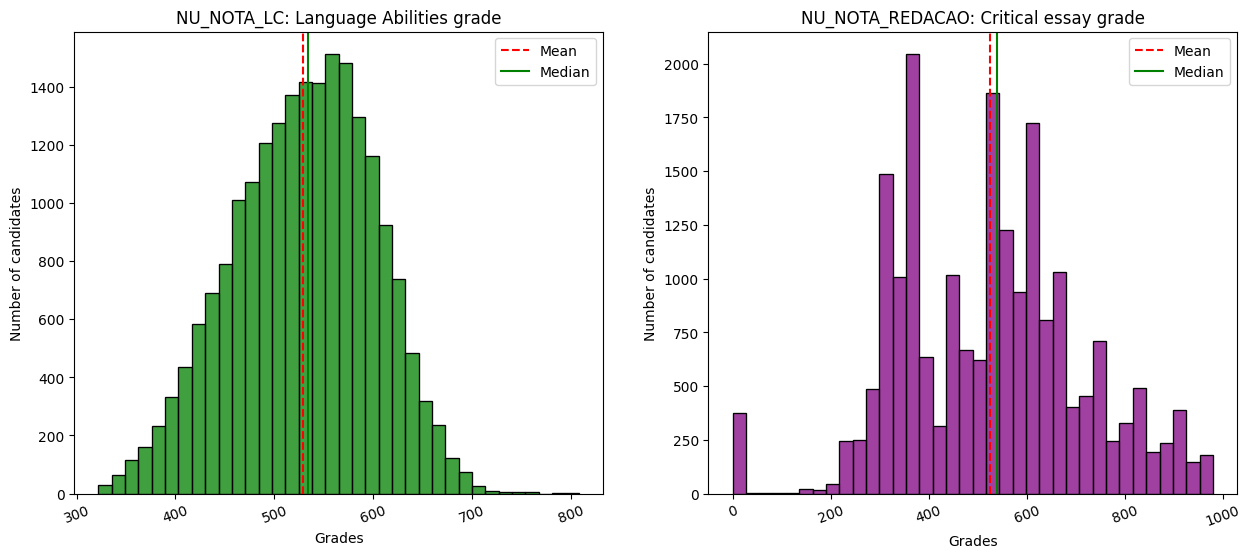

In [34]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")


# Creating subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Natural Sciences
ax1 = ax[0]
sns.histplot(x=df_EDA['NU_NOTA_CN'], bins=int(180/5), color='blue', edgecolor='black', ax=ax1)
mean_cn = df_EDA['NU_NOTA_CN'].mean()
median_cn = df_EDA['NU_NOTA_CN'].median()
ax1.axvline(x=mean_cn, color='red', linestyle='--', label='Mean')
ax1.axvline(x=median_cn, color='green', linestyle='-', label='Median')

ax1.set(xlabel='Grades', ylabel='Number of candidates', title='NU_NOTA_CN: Natural Sciences grade')
for label in ax1.get_xticklabels():
    label.set_rotation(20)
ax1.legend()

# Human Sciences
ax2 = ax[1]
sns.histplot(x=df_EDA['NU_NOTA_CH'], bins=int(180/5), color='yellow', edgecolor='black', ax=ax2)
mean_cn = df_EDA['NU_NOTA_CH'].mean()
median_cn = df_EDA['NU_NOTA_CH'].median()
ax2.axvline(x=mean_cn, color='red', linestyle='--', label='Mean')
ax2.axvline(x=median_cn, color='green', linestyle='-', label='Median')

ax2.set(xlabel='Grades', ylabel='Number of candidates', title='NU_NOTA_CH: Human Sciences grade')
for label in ax2.get_xticklabels():
    label.set_rotation(20)
ax2.legend()

# Math
ax3 = ax[2]
sns.histplot(x=df_EDA['NU_NOTA_MT'], bins=int(180/5), color='pink', edgecolor='black', ax=ax3)
mean_cn = df_EDA['NU_NOTA_MT'].mean()
median_cn = df_EDA['NU_NOTA_MT'].median()
ax3.axvline(x=mean_cn, color='red', linestyle='--', label='Mean')
ax3.axvline(x=median_cn, color='green', linestyle='-', label='Median')
ax3.set(xlabel='Grades', ylabel='Number of candidates', title='NU_NOTA_MT: Mathematics grade')
for label in ax3.get_xticklabels():
    label.set_rotation(20)
ax3.legend()

plt.show()


fig, ax = plt.subplots(1, 2, figsize=(15, 6))
# Languages
ax4 = ax[0]
sns.histplot(x=df_EDA['NU_NOTA_LC'], bins=int(180/5), color='green', edgecolor='black', ax=ax4)
mean_cn = df_EDA['NU_NOTA_LC'].mean()
median_cn = df_EDA['NU_NOTA_LC'].median()
ax4.axvline(x=mean_cn, color='red', linestyle='--', label='Mean')
ax4.axvline(x=median_cn, color='green', linestyle='-', label='Median')
ax4.set(xlabel='Grades', ylabel='Number of candidates', title='NU_NOTA_LC: Language Abilities grade')
for label in ax4.get_xticklabels():
    label.set_rotation(20)
ax4.legend()


# Natural Sciences
ax5 = ax[1]
sns.histplot(x=df_EDA['NU_NOTA_REDACAO'], bins=int(180/5), color='purple', edgecolor='black', ax=ax5)
mean_cn = df_EDA['NU_NOTA_REDACAO'].mean()
median_cn = df_EDA['NU_NOTA_REDACAO'].median()
ax5.axvline(x=mean_cn, color='red', linestyle='--', label='Mean')
ax5.axvline(x=median_cn, color='green', linestyle='-', label='Median')

ax5.set(xlabel='Grades', ylabel='Number of candidates', title='NU_NOTA_REDACAO: Critical essay grade')
for label in ax5.get_xticklabels():
    label.set_rotation(20)
ax5.legend()

plt.show()

<div class="alert alert-info">
<strong><div style="color: rgb(0, 0, 0);">📌  Insights:</div></strong> <br>
<div style="color: rgb(0, 0, 0);">→ The highest mean was for Human Sciences, which more candidates concentrating in the right tail;</div>
<div style="color: rgb(0, 0, 0);">→ Natural Sciences and Maths appear to have been the toughest subjects (we were there and agree), with most of the candidates having a smaller grade, a bigger left tail;</div>
<div style="color: rgb(0, 0, 0);">→ The Languages grade distribution looks a lot like a normal distribution;</div>
</div>

## 3.3 What are the mean grades for each class category?

Let's check out the following:

> - Type of school X Grades
> - Type of school X Income
> - Family Income X Grades

### Type of school X Grades

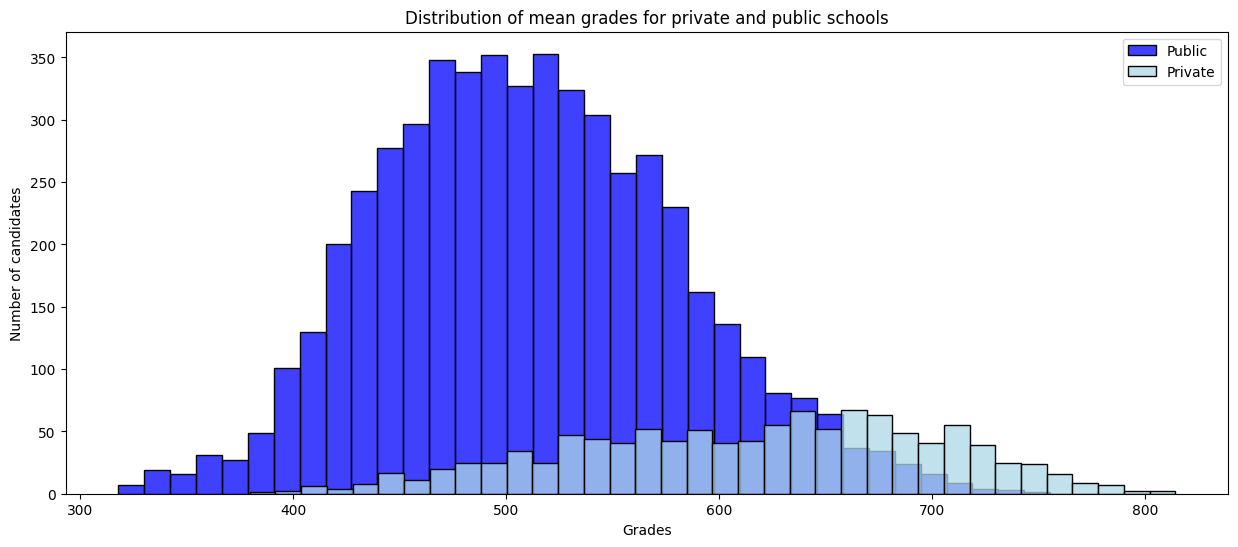

In [35]:
# Creating columns for average grade
df_EDA["MEAN_GRADES"] = df_EDA[['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean(axis=1)
df_private = df_EDA[df_EDA["TP_ESCOLA"]=="Private"]
df_public = df_EDA[df_EDA["TP_ESCOLA"]=="Public"]

# Plotting histogram
plt.figure(figsize=(15, 6))
ax = sns.histplot(data=df_public,x='MEAN_GRADES', bins=int(180/5), color='blue', edgecolor='black', label='Public')
ax = sns.histplot(data=df_private,x='MEAN_GRADES', bins=int(180/5), color='lightblue', edgecolor='black',label='Private')
ax.set(xlabel='Grades', ylabel='Number of candidates', title='Distribution of mean grades for private and public schools')
ax.legend()

plt.show()

### Family Income X Grades

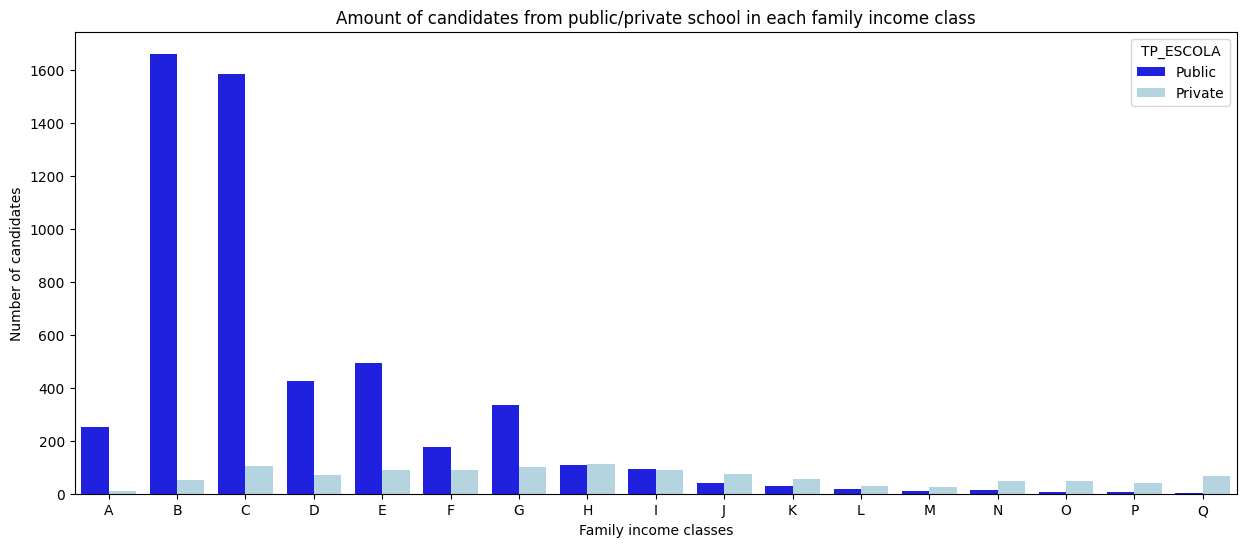

In [36]:
combined_df = pd.concat([df_public, df_private], ignore_index=True)
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=combined_df,x='Q006',hue='TP_ESCOLA',palette=['blue',"lightblue"])
ax.set(xlabel='Family income classes', ylabel='Number of candidates', title='Amount of candidates from public/private school in each family income class')
plt.show()

### Family income X Grade

| Category | Income range (in Reais) |
|---|---|
| A | No income. |
| B | until 954,00. |
| C | frmo 954,01 until 1.431,00. |
| D | from 1.431,01 until 1.908,00. |
| E | from 1.908,01 until 2.385,00. |
| F | frmo 2.385,01 until 2.862,00. |
| G | from 2.862,01 until 3.816,00. |
| H | from 3.816,01 until 4.770,00. |
| I | from 4.770,01 until 5.724,00. |
| J | frmo 5.724,01 until 6.678,00. |
| K | from 6.678,01 until 7.632,00. |
| L | from 7.632,01 until 8.586,00. |
| M | from 8.586,01 until 9.540,00. |
| N | from 9.540,01 until 11.448,00. |
| O | from 11.448,01 until 14.310,00. |
| P | from 14.310,01 until 19.080,00. |
| Q | > 19.080,00.   |

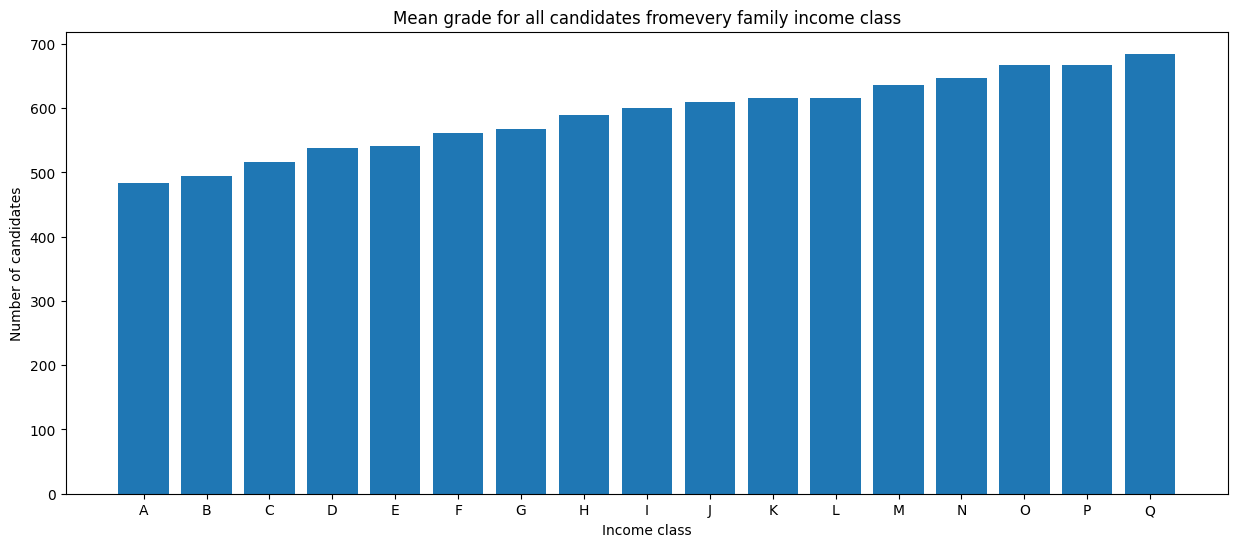

In [37]:
fig, ax = plt.subplots(figsize=(15, 6))
classes = df_EDA["Q006"].unique().tolist()
mean_grades = df_EDA.groupby(["Q006"])['MEAN_GRADES'].mean().tolist()
plt.bar(classes, mean_grades)

ax.set_ylabel('Number of candidates')
ax.set_xlabel('Income class')
ax.set_title('Mean grade for all candidates fromevery family income class')

plt.show()

<div class="alert alert-info">
<strong><div style="color: rgb(0, 0, 0);">📌  Insights:</div></strong> <br>
<div style="color: rgb(0, 0, 0);">→ The distriution of grades of candidates from private schools are more to the left than for public schools;</div>
<div style="color: rgb(0, 0, 0);">→ The candidates that belong to lower family income classes also mostly go to public schools, while higer income classes go to private school. That is also common knowledge nowadays in Brazil, unfortunately, since the private school tend to offer a better education than public ones.;</div>
<div style="color: rgb(0, 0, 0);">→ The higher the family income class, the higher the candidates mean grades;</div>
</div>

# 4. Feature Extraction <a class="anchor" id="4"></a>

Now that we already did the Exploratory Data Analysis, we should **drop features that may lead to a biased model**. The features indicating **sex** and **ethnicity** are typically the ones we drop in that case.

We know that someone's ethnicity shouldn't influence their grade in an exam per se. If we see a correlation, it shows characteristics of structural racism, in which ethnic minorities have less opportunities, in our case, that is reflected, for example, on the family income. So we will drop these two features. That way we can leave our model to focus on other features that provide more causation to the issue. 

In [38]:
df = df.drop(['TP_COR_RACA', 'TP_SEXO'],axis=1)

We will use for our analysis only the mean instead of all 5 subject grades for each candidate. This will be our target variable later.

$${RESULT} = \frac{\sum_{i=1}^{5} x_i}{5}$$

$x$ = [`NU_NOTA_CN`,`NU_NOTA_CH`,`NU_NOTA_LC`,`NU_NOTA_MT`,`NU_NOTA_REDACAO`]

In [39]:
df["RESULT"] = df[['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean(axis=1)
df = df.drop(['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO'],axis=1)

For better interpretabilty of our model and a more efficient memory usage, we will convert the the pandas "Object" type variables into numeric variables for all questionnaire columns (`Q001`,`Q002`,...)

In [40]:
#Transforming categorical data to numeric
for i in range(1,28):
    if i < 10:
        name = f"Q00{i}"
    elif i == 26:
        continue
    else:
        name = f"Q0{i}"
    df[name] = df[name].astype('category').cat.codes

The columns `TP_ENSINO` and `TP_ESTADO_CIVIL` are still in float format, even though they are integers. Let's convert them to save memory space

In [41]:
df['TP_ENSINO'] = df['TP_ENSINO'].astype(int)
df['TP_ESTADO_CIVIL'] = df['TP_ESTADO_CIVIL'].astype(int)

In [42]:
print(df.dtypes)

TP_FAIXA_ETARIA      int64
TP_ESTADO_CIVIL      int64
TP_ST_CONCLUSAO      int64
TP_ESCOLA            int64
TP_ENSINO            int64
Q001                  int8
Q002                  int8
Q003                  int8
Q004                  int8
Q005                  int8
Q006                  int8
Q007                  int8
Q008                  int8
Q009                  int8
Q010                  int8
Q011                  int8
Q012                  int8
Q013                  int8
Q014                  int8
Q015                  int8
Q016                  int8
Q017                  int8
Q018                  int8
Q019                  int8
Q020                  int8
Q021                  int8
Q022                  int8
Q023                  int8
Q024                  int8
Q025                  int8
Q027                  int8
RESULT             float64
dtype: object


We can also check out the correlation between the columns. There are of course very correlated features such as family income and job category of the parents. We can drop one of them since they are correlated or even could do a PCA to create a new feature.

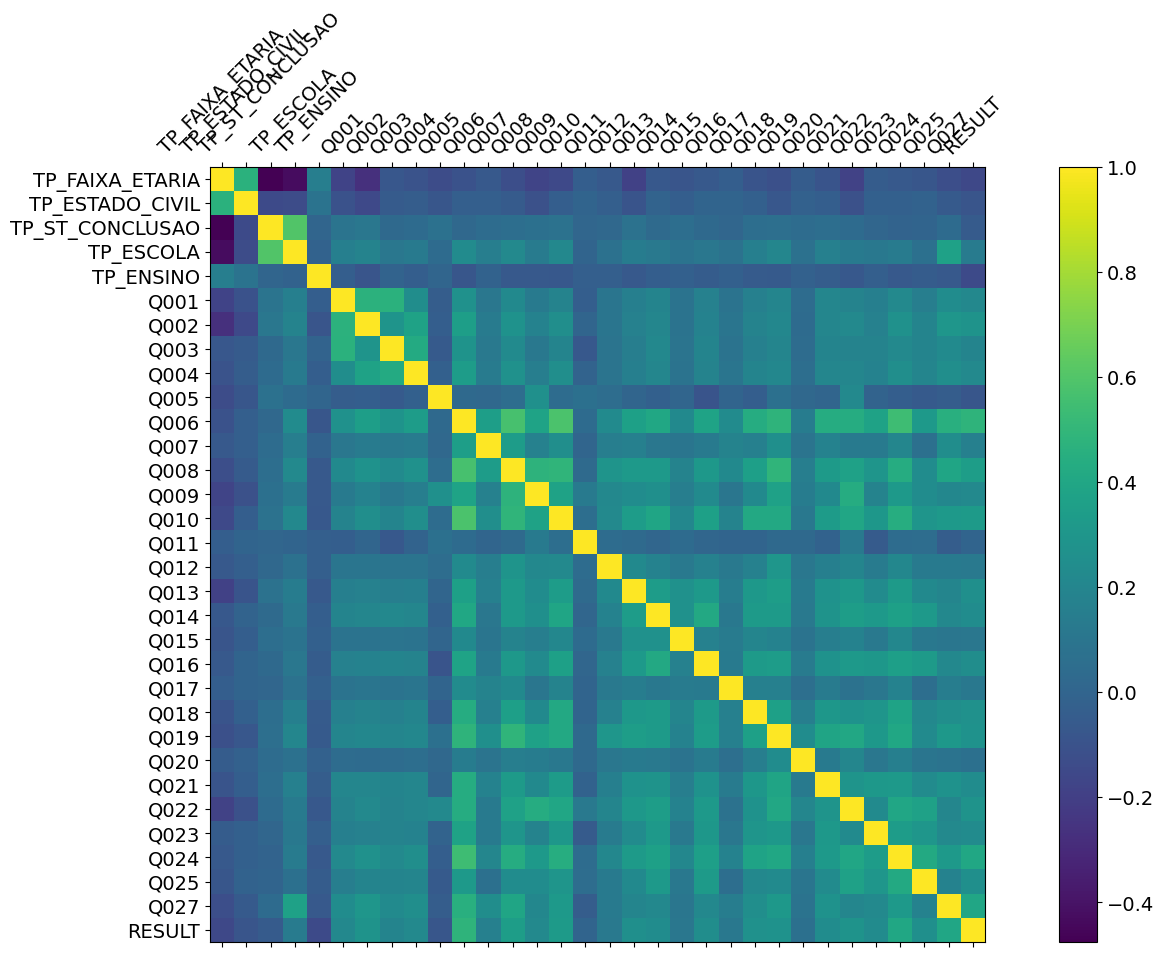

In [43]:
f = plt.figure(figsize=(19, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

# 5. Hypothesis Testing <a class="anchor" id="5"></a>

In a **fair educational** system, in which **equal opportunities** are offered to all students, **regardless of where they come from or their financial situation**, someone's **grade** in the national exam **shouldn't be influenced by their family's income**. However, we can see that the feature `Q006`, which relates to the candidate's family income, has a great importance relative to our target variable `RESULTS`, which is the average of the candidate's grades in the exam. We have already seen from the EDA the higher the family income, the higher the mean grade across candidates. With that in mind, let's see if that is due to chance or if there really is a **significant difference** of **mean final grade** in the exam between candidate's with **different family incomes**:

> **$H_0$: Null Hypothesis**
>
> *The mean of exam results (`RESULTS`) is equal across all family income categories (`Q006`):*
> $\mu_A=\mu_B=\ldots=\mu_Q$

> **H1: Alternative Hypothesis**
>
> *The mean of exam results (`RESULTS`) is **NOT** equal across all family income categories (`Q006`):*
>  $\mu_A \neq \mu_B \neq \ldots \neq \mu_Q$

We have 17 different family income categories, from A to Q:

| Category | Income range (in Reais) |
|---|---|
| A | No income. |
| B | until 954,00. |
| C | frmo 954,01 until 1.431,00. |
| D | from 1.431,01 until 1.908,00. |
| E | from 1.908,01 until 2.385,00. |
| F | frmo 2.385,01 until 2.862,00. |
| G | from 2.862,01 until 3.816,00. |
| H | from 3.816,01 until 4.770,00. |
| I | from 4.770,01 until 5.724,00. |
| J | frmo 5.724,01 until 6.678,00. |
| K | from 6.678,01 until 7.632,00. |
| L | from 7.632,01 until 8.586,00. |
| M | from 8.586,01 until 9.540,00. |
| N | from 9.540,01 until 11.448,00. |
| O | from 11.448,01 until 14.310,00. |
| P | from 14.310,01 until 19.080,00. |
| Q | > 19.080,00.   |
 
For comparing the means of these 17 different populations (family income classes), we can use the **One-Way ANOVA for unequal sample sizes**.

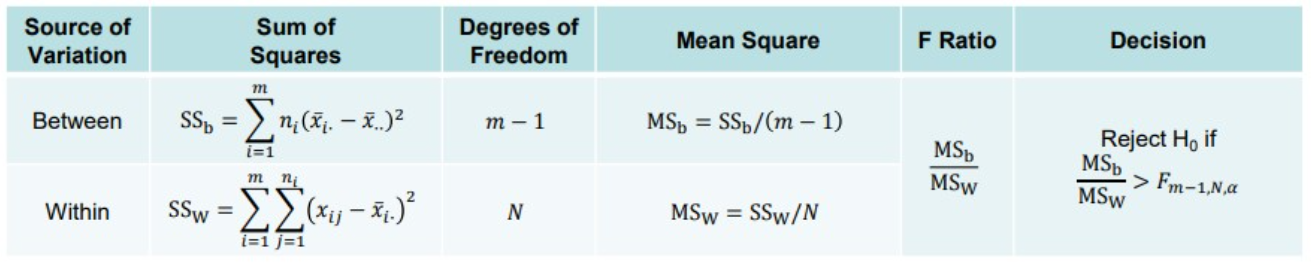

In [44]:
# Let's create a dataset only with the two columns we will be using
df_hypothesis = deepcopy(df[['Q006','RESULT']])

We need the quantities $$\bar{x}_{\cdot\cdot}=\frac{\sum_{i=1}^{m}\sum_{j=1}^{n_{i}}x_{ij}}{\sum_{i=1}^{m}n_{i}}$$

$$\bar{x}_{i\cdot}=\sum_{j=1}^{n_{i}}x_{ij}/n_{i}$$

In [45]:
xi_ = df_hypothesis.groupby(["Q006"])['RESULT'].mean().tolist()
x__ = np.mean(df_hypothesis['RESULT'])

print("x__ =",x__)

x__ = 530.6655299315435


Sum of squares between group variability (Variation due to chance and tratment effect): $$\mathrm{SS}_{\mathrm{b}}=\sum_{i=1}^{m}n_{i}\left(\bar{x}_{i\cdot}-\bar{x}_{..}\right)^{2}$$

In [46]:
ni = df_hypothesis['Q006'].value_counts(sort=False)
ssb = sum( [nii*(xii-x__)**2 for nii, xii in zip(ni, xi_)] )
print("SS_b:",ssb)

SS_b: 37357602.70496544


Sum of squares within: $$\mathrm{SS}_{\mathrm{w}}=\sum_{i=1}^{m} \sum_{j=1}^{n_i} \left(x_{ij}-\bar{x}_{i.}\right)^{2}$$

In [47]:
m = 17
ssw = 0
for i in range(m):
    X_i = df_hypothesis[df_hypothesis['Q006']==i]['RESULT'].tolist()
    for j in range(ni[i]):
        ssw += (X_i[j] - xi_[i])**2

print("SS_w:",ssw)

SS_w: 106810125.14798781


Mean square between $$\mathrm{MS}_{\mathrm{b}}=\mathrm{SS}_{\mathrm{b}}/\left(m-1\right)$$

Mean square within $$\mathrm{MS}_{\mathrm{w}}=\mathrm{SS}_{\mathrm{w}}/N, $$

where $N=\sum_{i}n_{i}-m$

In [48]:
# Mean square between
msb = ssb/(m-1)

N = sum(ni) - m
# Mean square within
msw = ssw/N

print("MS_b:",msb)
print("MS_w:",msw)

MS_b: 2334850.16906034
MS_w: 5189.996362875987


Calculating the test statistic **F-ratio**:
    
$$F = \frac{MS_b}{MS_w}$$

In [49]:
F = msb/msw
print("F:",F)

F: 449.8751069965115


Let's check what the critic value for $F_{\alpha,m-1,N} $ is to reject the hypothesis, with the significance $\alpha=0.05$


In [50]:
from scipy.stats import f

alpha = 0.05
print("F_critic:",f.ppf(alpha, m-1, N))

F_critic: 0.4975298700159476


Since $F > F_{0.05,16,N}$, we reject the null hypothesis $H_0$ that mean of exam results are equal across all family income categories

# 6. Modeling and Prediction <a class="anchor" id="6"></a>

We have now in our dataset the target variable `RESULT` and 31 others features, some related to each other more than others. Let's analyse the feature importance using the Gini Gain (Mean Decrease in Impurity)

We have chosen to separate our dateset using the Train-Test Split method, which is separating our model into a Training set and a Test set. The proportion that we used is 80/20 (80% training, 20% testing).

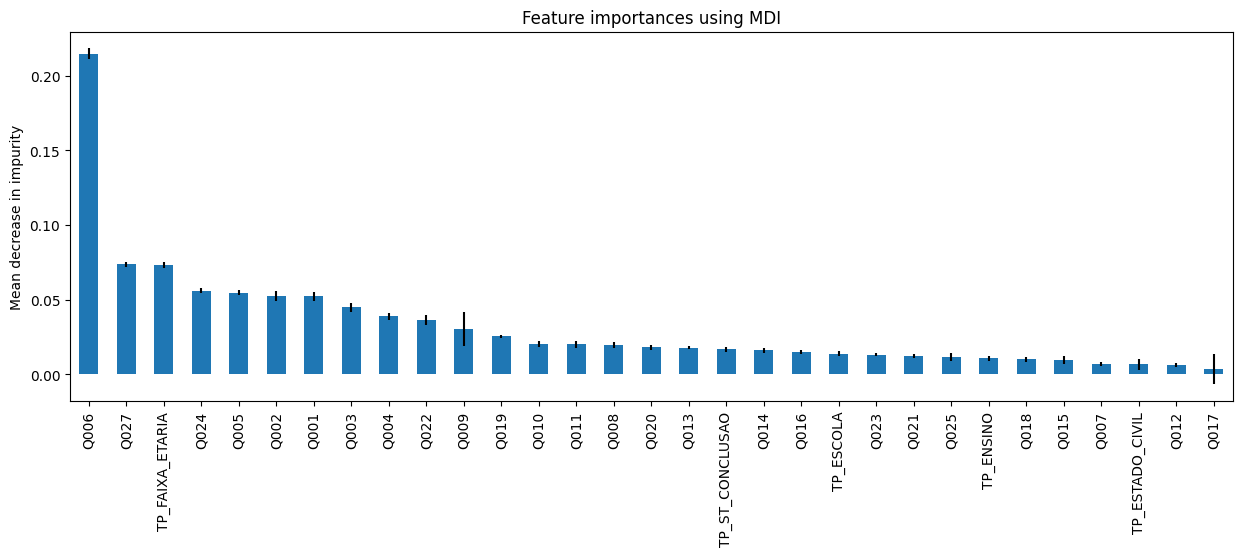

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


X, y = df.iloc[:, :-1], df['RESULT']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
forest = RandomForestRegressor()

forest.fit(X_train,y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
fig.set_figwidth(15)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.show()

To select the best features for our model, we used the Recursive Feature Elimination with Cross-Validation (RFECV).
RFECV is a feature selection technique that combines Recursive Feature Elimination (RFE) with cross-validation to determine the optimal number of features for a model. It is divided in 4 main steps:
- Feature Ranking:
    - The estimator (in our case the Random Forest Regressor) is trained on the full set of features.
    - Features are ranked based on their importance (e.g., using coef_ or feature_importances_).
- Recursive Elimination:
    - A specified number of features (determined by the step parameter) are eliminated based on their ranking.
    - The process is repeated on the reduced feature set.
- Cross-Validation:
    - The entire process (feature ranking and elimination) is performed multiple times using cross-validation to assess the performance of the model with different numbers of features.
    - This helps to prevent overfitting and provides a more reliable estimate of feature importance.
- Optimal Feature Selection:
    - The number of features that yields the best cross-validation score is selected as the optimal number.

In [52]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 1  # Minimum number of features to consider
rf = RandomForestRegressor()
#cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=rf,
    step=1,
    cv=5,
    scoring="neg_mean_squared_error",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X_train, y_train.values.ravel())

RFECV(cv=5, estimator=RandomForestRegressor(), n_jobs=2,
      scoring='neg_mean_squared_error')

In [53]:
print(f"Optimal number of features: {rfecv.n_features_}")
print(f'Used features {rfecv.feature_names_in_[rfecv.support_]}')

Optimal number of features: 29
Used features ['TP_FAIXA_ETARIA' 'TP_ESTADO_CIVIL' 'TP_ST_CONCLUSAO' 'TP_ESCOLA'
 'TP_ENSINO' 'Q001' 'Q002' 'Q003' 'Q004' 'Q005' 'Q006' 'Q007' 'Q008'
 'Q009' 'Q010' 'Q011' 'Q013' 'Q014' 'Q015' 'Q016' 'Q018' 'Q019' 'Q020'
 'Q021' 'Q022' 'Q023' 'Q024' 'Q025' 'Q027']


With that we can select the number of features by being the where it maximises our matric, being the Negative Mean Squared Error, as the formula seen bellow:

$$\text{NMSE} = -\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

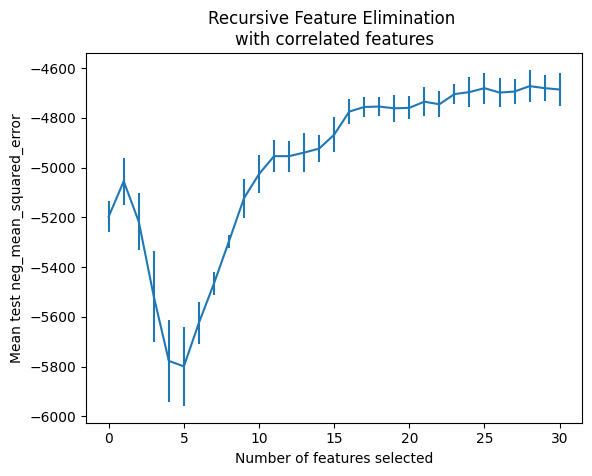

In [54]:
cv_results = pd.DataFrame(rfecv.cv_results_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test neg_mean_squared_error")
plt.errorbar(
    x=cv_results.index,
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

For our metric, we decided to use the Root mean square error and the R-squared, with the formulas seem bellow:

$$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$$

$$RMSE = \sqrt{\frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n}}$$

Both R-squared and RMSE are widely used in regression analysis to evaluate the performance of models. R-squared is a relative measure of fit, while RMSE is an absolute measure of error.

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred1 = rfecv.predict(X_test) 
print(f"Root mean square error is : {mean_squared_error(y_test, y_pred1)**(0.5)}")
print(f"R-squared is : {r2_score(y_test, y_pred1)}")

Root mean square error is : 68.11642857424474
R-squared is : 0.3216261453113338


# 7. Conclusion <a class="anchor" id="7"></a>

<div class="alert alert-info">
<strong><div style="color: rgb(0, 0, 0);">📌  Insights:</div></strong> <br>
<div style="color: rgb(0, 0, 0);">→ After the EDA and the hypothesis testing, it is left very clear how much a candidate's family income is determinant to their performance in the ENEM. The ENEM is the main college admission exam in the country and the strong correlation that we saw between income and grade translates into awarding a more wealthy candidate a spot in university and leaving a poorer one out, perpetuating the poverty cycle. A temporary measure that universities are currently using to truly spot the outstading candidates within their minority groups is through minority quotas for college admissions for public school students and for ethnical minorities. This is however not an effective long-term measure and we hope more investment in public schools and base education in Brazil can bring equal opportunities among all candidates so that we don't see any correlation between income and performance anymore!;</div>
<div style="color: rgb(0, 0, 0);">→ We could select the most imporant features for determining a candidate's average grade in the ENEM with a relatively low error (68 points from around 1000)</div>
</div>

<div class="alert alert-danger">
<strong><div style="color: rgb(0, 0, 0);">📌  Challenges and Future Work:</div></strong> <br>
<div style="color: rgb(0, 0, 0);">→ Because of lack of computational power and memory, we did the analysis on only a portion of the whole daatset (5.5mi). It is not ideal and may have led to worse results and misleading analysis.;</div>
<div style="color: rgb(0, 0, 0);">→ We didn't have time to test different regression methods and make a comparative study between them. That would have been very interesting.</div>
<div style="color: rgb(0, 0, 0);">→ We dropped many columns or rows to solve missing data issues. That is not the best way to do it in production, specially when the data is as meaningful as what we have here (already treated data). </div>
<div style="color: rgb(0, 0, 0);">→ The hypothesis testing was 1uite obvious, but still an rigorous statistical approach to avoid being biased towards an obvious direction. We could however test other less obvious things in our analysis, such as difference in performance based on age and what could that mean. </div>
<div style="color: rgb(0, 0, 0);">→ A very meaningul analysis would include crossing the data with the schools where the candidates are from (how many teachers, how much ressources, how many students in the school) and also the sity in which the school is located (HDI, population size, income per capta, sanitation data, public transportation, healthcare) </div>
</div>

# References <a class="anchor" id="8"></a>

The contents for the **Hypothesis Testing** were taken from the tutorials from the lecture:

> Debes, C. (2024, Summer). Data Science I - 18-zo-2110-vl. Lecture course. Technische Universität Darmstadt, Darmstadt, Germany.

We were inspired by the **visual features** used in SmartPay notebook from Felipe Gomes available in Kaggle:
> Gomes, F. (2022). Smartpay - Calculadora de Salário Rio (GAMLSS.nb). [Kaggle](https://www.kaggle.com/code/gomes555/smartpay-calculadora-de-sal-rio-gamlss-nb)

**Dataset**: The public data from the Brazilian Ministry of Education for the microdata for the ENEM 2018:
> Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira. Microdados do Enem 2018. 
[online]. Brasília: Inep, 2018: <http://portal.inep.gov.br/web/guest/microdados>

**Python libraries**
> - **Seaborn**: Waskom, M. L., (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021, https://doi.org/10.21105/joss.03021.
> - **Matplotlib**: J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.
> - **Sklearn**>Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
> - **Numpy**: Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). DOI: 10.1038/s41586-020-2649-2. (Publisher link).
> - **Pandas**: McKinney, W., & others. (2010). Data structures for statistical computing in python. In Proceedings of the 9th Python in Science Conference (Vol. 445, pp. 51–56).